# Data Visualisation in python.

This article will give you a quick introduction to data analysis using python. Python is a powerful language with emphasis on simplicity in coding. One of the easiest programming langauge to learn, it powers many common applications, from dropbox to instagram. Its syntax is quite simple for e.g. no need of semicolons at ends of each line, no variable declarations at the beginning, simpler loops and so on. According to stack overflow developer survey, it is one of the most popular languages even surpassing C# and PHP (also the third most loved language).
[A guide to python in 40 mins](https://www.youtube.com/watch?v=N4mEzFDjqtA)

To show you how simple python can be, following code prints first `10` square numbers. Here, a list `l` is generated in range `0` to `10`, where `i**2` means `i^2`.

In [1]:
print( [i**2 for i in range(10)] ) 

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


## Importing libraries

For data analysis, we will use `pandas, matplotlib` and `seaborn` libraries. Library is a set of functions and methods that have been already written and can be accessed by nicknames. `import pandas as pd` means importing library named `pandas` with nickname `pd`. [Pandas](https://pandas.pydata.org/pandas-docs/stable/) is a popular library used for data analysis and manipulation. Its most powerful weapon is a data structure called dataframe, which can be understood as an excel sheet like tables. [Matplotlib](https://matplotlib.org/contents.html) and [Seaborn](https://seaborn.pydata.org/) libraries are used for visualisation.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Importing Data

We will be using **Pokemon** dataset. It contains various details for each pokemon like stage, attack and defense points, etc. We use `pd.read_csv('filename')` to load data as a dataframe. `df.head` shows first 5 rows of our dataset

In [3]:
df = pd.read_csv('Pokemon.csv', encoding = "ISO-8859-1", index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


From `df.info()` gives basic information about our dataset.We can see that our data frame has 12 columns with 151 rows. Each column and its corresponding data type is in the form of a table. `Name` column has 151 values which are of object type(it usually represents string and categorical values). `Type 2` column has 67 values. This means that more than half of the rows don't have this value. We can see in `df.head` in above tha 4th and 5th rows have missing values(shown by `NaN`) for this column. We will have to take care of this while plotting.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
Name         151 non-null object
Type 1       151 non-null object
Type 2       67 non-null object
Total        151 non-null int64
HP           151 non-null int64
Attack       151 non-null int64
Defense      151 non-null int64
Sp. Atk      151 non-null int64
Sp. Def      151 non-null int64
Speed        151 non-null int64
Stage        151 non-null int64
Legendary    151 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


`df.describe()` gives statistical information about the numerical columns in our dataset. `25%` represents 1st quartile or the maximum value of top 25% values. Similarly, `50%` represents 2nd quartile(or mean) which is top 50% values and so on.

In [5]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


## Ploting graphs

Matplotlib is usually enough for data visualisation purposes but Seaborn provides more simplicity and are way more soothing to eyes. We will set some values initially before plotting. `sns.set_context()` magnifies the graph. `sns.set_style()` sets the graph style. We have also defined list `pkmn_type_colors` which has Hex colour codes. This will be default colour scheme based on type of pokemon.

In [6]:
# Setting Seaborn styles
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.set_palette(pkmn_type_colors)

## Scatter Plot

The below graph shows the distribution of `Defence` and `Attack` features. Its also helps to detect correlation in these features. In general, we can conclude that they are positively correlated as they have almost linear proportionality. 

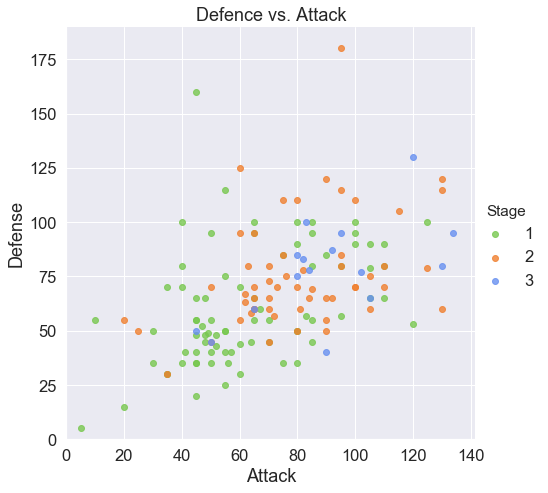

In [7]:
sns.lmplot(x='Attack', y='Defense', data=df, height = 7,
           fit_reg=False, # To show no regression line 
           hue='Stage'); # To show color by evolution stage

# Add title  
plt.title('Defence vs. Attack')                         
# Give range of graph using matplotlib
plt.ylim(0, None);
plt.xlim(0, None);

## Boxplot
Boxplots are one of the most essential tools for numerical values. The line in the middle represents the mean. The T-like portion at the top shows the maximum while the one at bottom shows minimum values. Diamond shapes are outliers. An outlier is a data point which is significantly different from most other data points. Most of the times they are due to some errors, but can also represent some useful information.

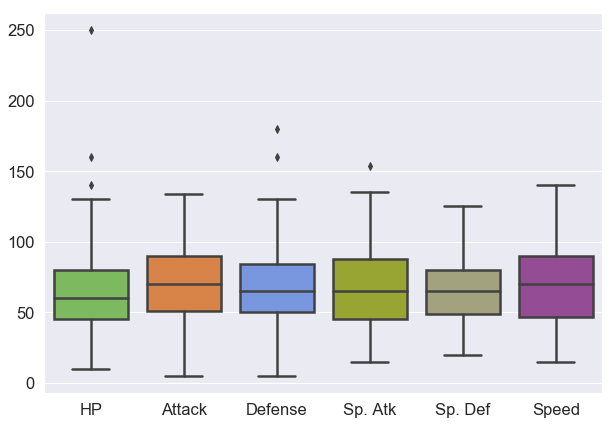

In [8]:
# Modified dataframe with only Total, Stage and Legendary columns
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

# Set size of graph
plt.figure(figsize=(10,7)) 
sns.boxplot(data=stats_df);

## Violin Plot
Violin plots are a hybrid version of box plots. The uneven widths represent the distribution of all data points. The white dot in the middle represents the mean.

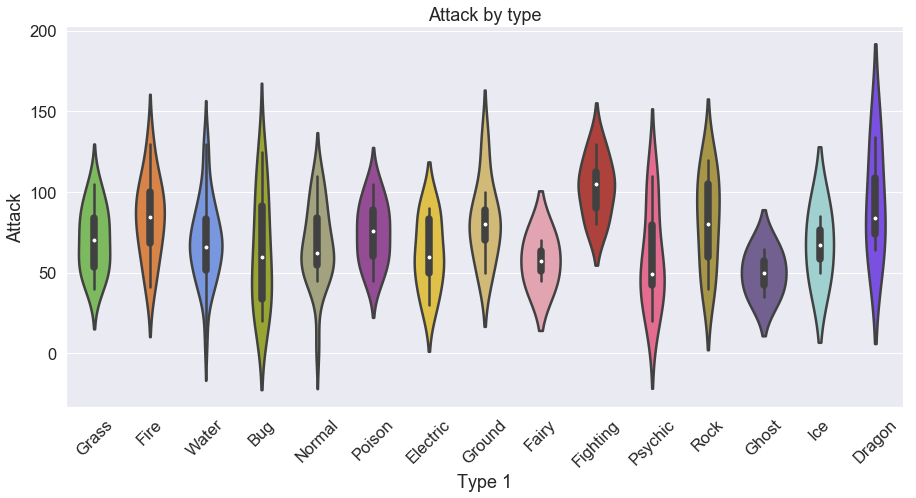

In [9]:
plt.figure(figsize=(15,7)); # Graph size
plt.xticks(rotation=45);  # Rotate labels of x-axis 
plt.title('Attack by type') # Add title
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors);

## Swarmplot
It is a modified version of scatterplot where the values of each category are seperated by colors and are not overlapping in different columns. We create a new data frame by `pd.melt()`. This will add a new column `Stat` which has speed, attack, defense etc. columns as values and another column `value` with its corresponding value. So now, we have reduced the width but increased the height of our original dataframe. `melted_df.head(10)` shows the first 10 rows. 

         Name Type 1  Type 2 Stat  value
0   Bulbasaur  Grass  Poison   HP     45
1     Ivysaur  Grass  Poison   HP     60
2    Venusaur  Grass  Poison   HP     80
3  Charmander   Fire     NaN   HP     39
4  Charmeleon   Fire     NaN   HP     58
5   Charizard   Fire  Flying   HP     78
6    Squirtle  Water     NaN   HP     44
7   Wartortle  Water     NaN   HP     59
8   Blastoise  Water     NaN   HP     79
9    Caterpie    Bug     NaN   HP     45


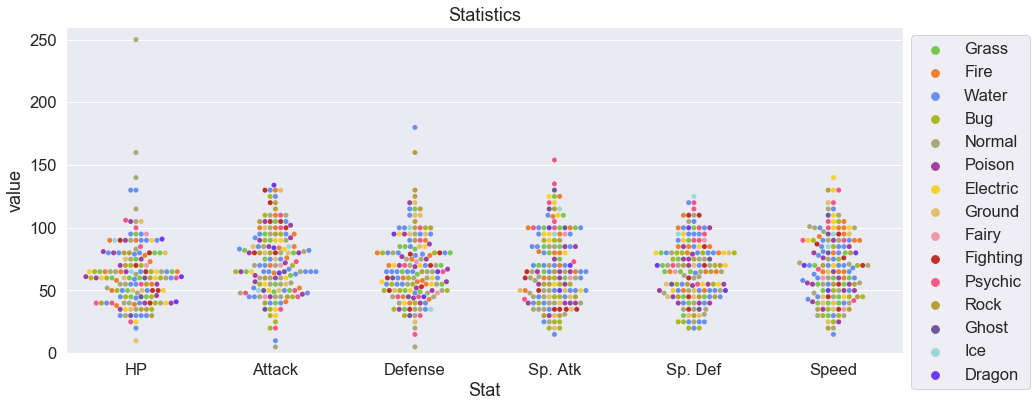

In [10]:
melted_df=pd.melt(stats_df,
                  id_vars=["Name","Type 1", "Type 2"], #features that won't combine
                  var_name="Stat") #name of new melted var
print(melted_df.head(10))
plt.figure(figsize=(15,6)); # Set size
plt.title('Statistics') # Add title
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1');
plt.ylim(0, 260) # add limits to y aixs
plt.legend(bbox_to_anchor=(1, 1), loc=2); # Move legend to the right

## Heatmap
It plots the correlation between different features. The colors show the correlation value. For example: The first box shows coreelation between `HP` and `HP` which will obviously be 1. The second box shows coreelation between `HP` and `Attack` and is coloured violet. So, the correlation is around 0.3. `stats_df.corr()` to find correlation value for each case.

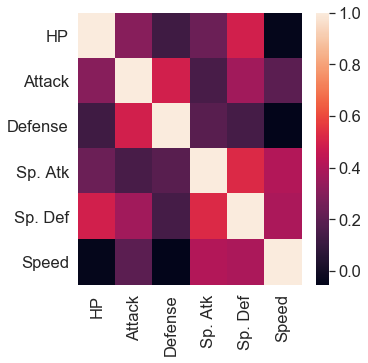

In [11]:
corr = stats_df.corr(); # Find correlation values
plt.figure(figsize=(5,5)); # Set size 
sns.heatmap(corr);

## Histogram
It plots the distribution of data points in `Attack` column.

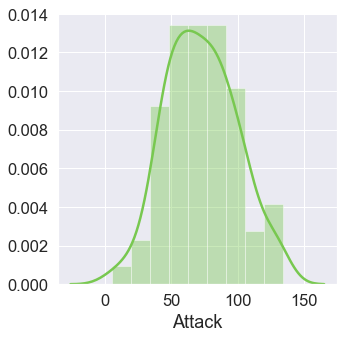

In [12]:
plt.figure(figsize=(5,5)); # Set Size 
sns.distplot(df.Attack);

## Count Plot
It simply plots the number of data points, or frequency, of each type of pokemon in our dataset.

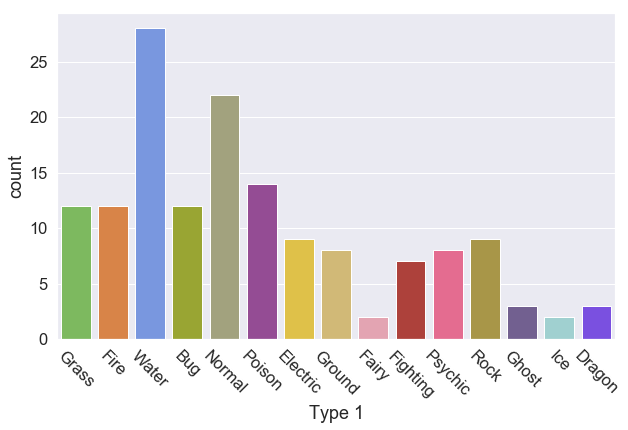

In [13]:
plt.figure(figsize=(10,6)); # Set size
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors);
plt.xticks(rotation=-45); # Rotate x labels

## Joint Distribution Plot
As thename suggests, it plots the joint distribution of `Attack` and `Defence` values. This is quite similar to the first plot that we made, the only difference being that the boxes the top and right show the individual distribution of `Attack` and `Defence` respectively. It basically crunches a histogram and scatterplot in one graph.

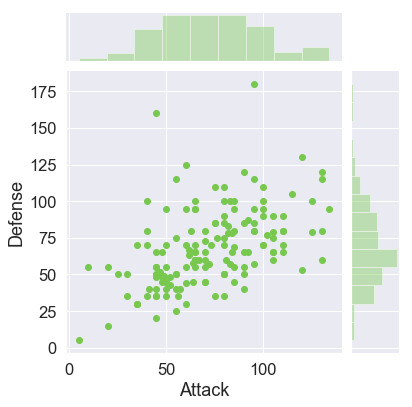

In [14]:
plt.figure(figsize=(7,7));
sns.jointplot(x='Attack', y='Defense', data=df);

## Conclusion

We have performed basic plotting of Pokemon dataset. It is a crucial step in data mining and machine learning. Those who don't know python, not to worry Internet can help you. While those who know python would've understood atleast some part of it. The intention was to introduce and show what data analysis actually is and how its implemented. If you are interested to learn more, multiple tutorials are available online, the documentation of python and the libraries are quite thorough yet simple. Specialized websites like [Elite Data Science](https://elitedatascience.com), [DataQuest](dataquest.io) and [DataCamp](https://www.datacamp.com) or MOOCs on edx, courseera and udemy are available. All you need to do is to just start.

***Written by Pratyaksha Jha (ECE first shift, final year) in Jupyter with Markdown and Python***